In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
day = 0
path = f"island-data-bottle-round-1/prices_round_1_day_{day}.csv"
path_nn = f"island-data-bottle-round-1/trades_round_1_day_{day}_nn.csv"
df = pd.read_csv(path, sep=';')
df_nn = pd.read_csv(path_nn, sep=';')

bananas = df[df['product']=="BANANAS"].reset_index(drop=True).fillna(0)
market = df_nn[df_nn['symbol'] == "BANANAS"].reset_index(
    drop=True).fillna(0)
price = df_nn[df_nn['symbol']=="BANANAS"]['price'].reset_index(drop=True).fillna(0)
qnt = df_nn[df_nn['symbol'] == "BANANAS"]['quantity'].reset_index(drop=True).fillna(0)


bananas['bid_volume'] = bananas['bid_volume_1'] + bananas['bid_volume_2'] + bananas['bid_volume_3']
bananas['ask_volume'] = bananas['ask_volume_1'] + bananas['ask_volume_2'] + bananas['ask_volume_3']



"""
for idx, price in enumerate(bananas['mid_price']):
    if idx == len(bananas['mid_price'][4000:6000])-1: break

    if bananas['bid_volume'][idx]-bananas['ask_volume'][idx] > 0:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='r')
    elif bananas['bid_volume'][idx]-bananas['ask_volume'][idx] == 0:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='b')
    else:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='g')
"""




"\nfor idx, price in enumerate(bananas['mid_price']):\n    if idx == len(bananas['mid_price'][4000:6000])-1: break\n\n    if bananas['bid_volume'][idx]-bananas['ask_volume'][idx] > 0:\n        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='r')\n    elif bananas['bid_volume'][idx]-bananas['ask_volume'][idx] == 0:\n        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='b')\n    else:\n        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='g')\n"

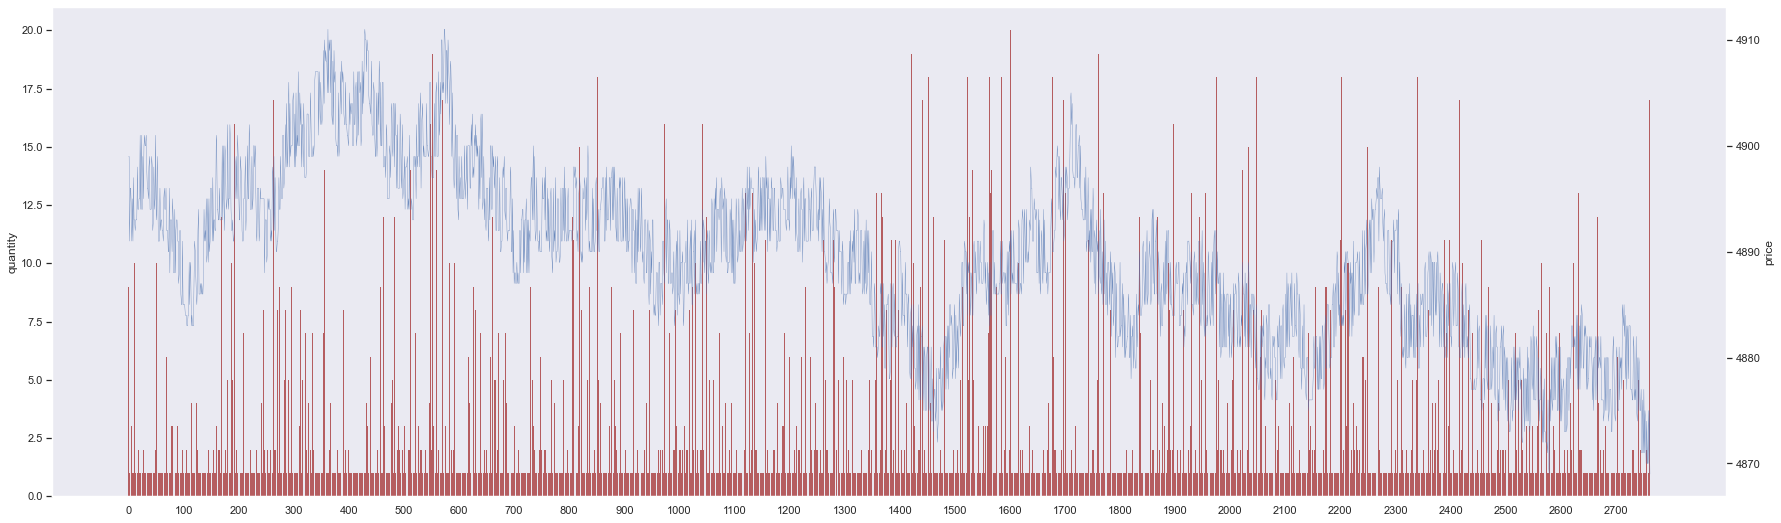

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize': (30, 9)})
sns.set_theme()

market['qlt'] = np.where(market['quantity']>=10, market['quantity'], 0)
ax = sns.barplot(data=market, x=market.index, y='quantity', lw=0., color='r')
ax.set_xticks(range(0, len(market['quantity']), 100))
ax2 = ax.twinx()
sns.lineplot(data=market, x = market.index, y = 'price', ax = ax2, color='b', linewidth=0.3)
ax.grid(False)
ax2.grid(False)
plt.savefig('price-volume.png', dpi=300)
